<h1>A Smart Approval for Loan Approval Prediction By using Machine Learning Techniques.</h1>


Loans are the major requirement for the modern world. By this alone, banks receive a major portion of the total profit. It is beneficial for students,people to manage their education and living expenses, and for individuals to purchase various luxuries items such as houses and cars. But when it comes to deciding whether the applicant's profile is relevant to be grant with loan approval (or) not. Banks have to look after many aspects.

So,to predict the loan will be Approved (or) Not?.By using machine learning algorithms to easy their work and predict whether the candidate’s profile is relevant or not, By using key features like No.of.Dependents,Education, Self_employed, Income_Annum,Loan_Amount,Loan_term,Cibil_score,Residential_assets_value,Commerical_assets_value,Luxury_assets_value,Bank_assets_value.


In [1]:
#importing  all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt         
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load the dataset
data = pd.read_csv('loan_approval_dataset.csv')

In [3]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
data.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [5]:
data.shape

(4269, 13)

In [6]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
# Removing spaces from column names
data.columns = data.columns.str.replace(' ', '')

In [8]:
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [10]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [11]:
# dropping 'loan_id' column as it is not useful for prediction
data.drop(columns = ['loan_id'], inplace=True)

In [12]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [13]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [14]:
data['residential_assets_value'] = data.residential_assets_value + data.commercial_assets_value+data.luxury_assets_value + data.bank_asset_value

In [15]:
data.drop(columns = ['commercial_assets_value','luxury_assets_value','bank_asset_value'], inplace = True)
data.rename(columns = {'residential_assets_value':'Total_assets'}, inplace = True)

In [16]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Total_assets,loan_status
0,2,Graduate,No,9600000,29900000,12,778,50700000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,17000000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,57700000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,52700000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,55000000,Rejected


In [17]:
# checking for missing values
data.isnull().sum()

no_of_dependents    0
education           0
self_employed       0
income_annum        0
loan_amount         0
loan_term           0
cibil_score         0
Total_assets        0
loan_status         0
dtype: int64

In [18]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Total_assets,loan_status
0,2,Graduate,No,9600000,29900000,12,778,50700000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,17000000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,57700000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,52700000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,55000000,Rejected


<h3>Visualize all the data of the objects type data</h3>


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


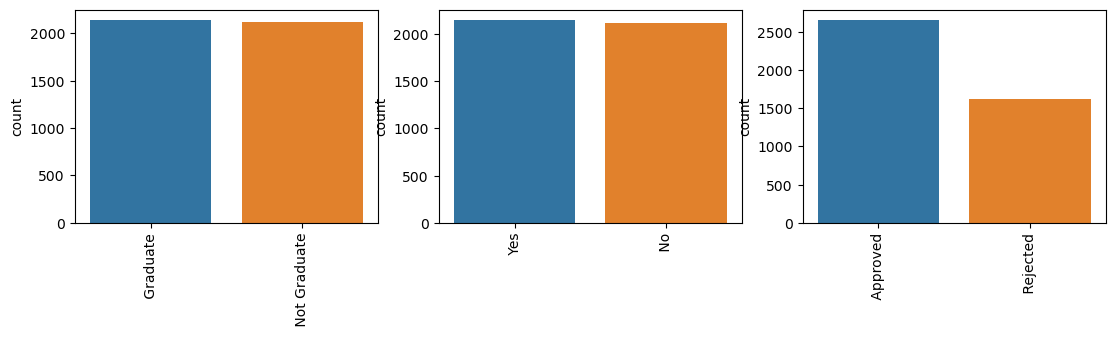

In [19]:
# Visualizing the data
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

# Finding no.of object(or) categorical varibles in dataset


In [20]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 3


In [21]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Total_assets,loan_status
0,2,Graduate,No,9600000,29900000,12,778,50700000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,17000000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,57700000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,52700000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,55000000,Rejected


# Convert the data of objects into Numerical values


In [22]:
data.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [23]:
def clean_data(st):
    st = st.strip()
    return st

In [24]:
clean_data(' Graduate')

'Graduate'

In [25]:
data.education = data.education.apply(clean_data)

In [26]:
data.education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [27]:
data['education'] = data['education'].replace(['Graduate', 'Not Graduate'],[1,0])

In [28]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Total_assets,loan_status
0,2,1,No,9600000,29900000,12,778,50700000,Approved
1,0,0,Yes,4100000,12200000,8,417,17000000,Rejected
2,3,1,No,9100000,29700000,20,506,57700000,Rejected
3,3,1,No,8200000,30700000,8,467,52700000,Rejected
4,5,0,Yes,9800000,24200000,20,382,55000000,Rejected


In [29]:
data.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [30]:
data.self_employed = data.self_employed.apply(clean_data)

In [31]:
data.self_employed.unique()

array(['No', 'Yes'], dtype=object)

In [32]:
data.self_employed = data.self_employed.replace(['No', 'Yes'],[0,1])

In [33]:
data.head() 

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Total_assets,loan_status
0,2,1,0,9600000,29900000,12,778,50700000,Approved
1,0,0,1,4100000,12200000,8,417,17000000,Rejected
2,3,1,0,9100000,29700000,20,506,57700000,Rejected
3,3,1,0,8200000,30700000,8,467,52700000,Rejected
4,5,0,1,9800000,24200000,20,382,55000000,Rejected


In [34]:
data.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [35]:
data.loan_status = data.loan_status.apply(clean_data)

In [36]:
data.loan_status.unique()

array(['Approved', 'Rejected'], dtype=object)

In [37]:
data.loan_status = data.loan_status.replace(['Approved', 'Rejected'],[1,0])

In [38]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Total_assets,loan_status
0,2,1,0,9600000,29900000,12,778,50700000,1
1,0,0,1,4100000,12200000,8,417,17000000,0
2,3,1,0,9100000,29700000,20,506,57700000,0
3,3,1,0,8200000,30700000,8,467,52700000,0
4,5,0,1,9800000,24200000,20,382,55000000,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   no_of_dependents  4269 non-null   int64
 1   education         4269 non-null   int64
 2   self_employed     4269 non-null   int64
 3   income_annum      4269 non-null   int64
 4   loan_amount       4269 non-null   int64
 5   loan_term         4269 non-null   int64
 6   cibil_score       4269 non-null   int64
 7   Total_assets      4269 non-null   int64
 8   loan_status       4269 non-null   int64
dtypes: int64(9)
memory usage: 300.3 KB


<h3> we are finding the correlation between the columns (or) features</h3>


<Axes: >

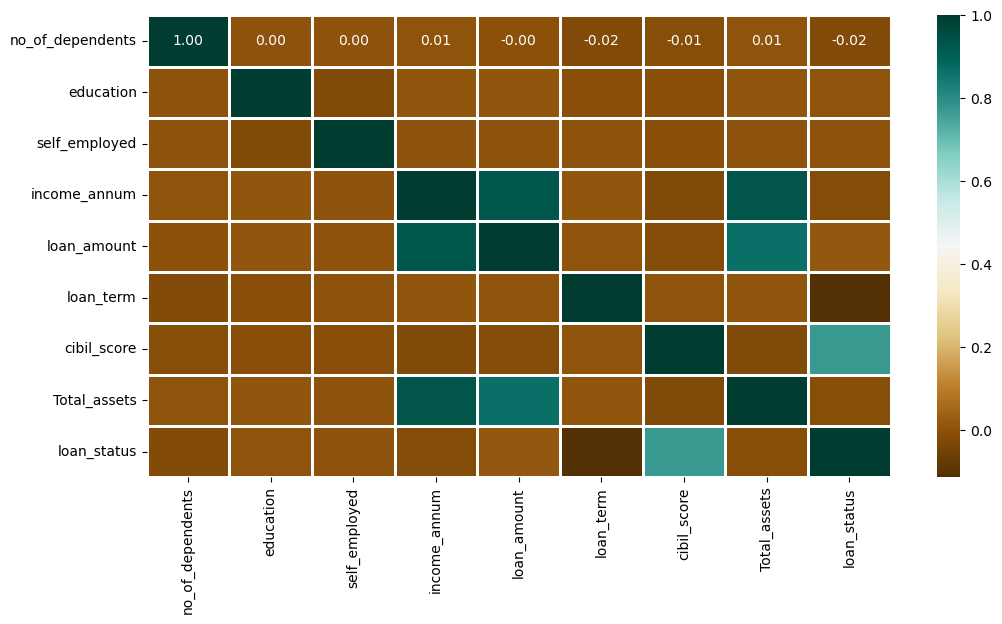

In [40]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

In [41]:
data['loan_status'].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [42]:
# DownSampling the data to handle class imbalance
approved = data[data['loan_status'] == 1].sample(n=1613)
rejected = data[data['loan_status'] == 0]
data = pd.concat([approved, rejected])
data['loan_status'].value_counts()

loan_status
1    1613
0    1613
Name: count, dtype: int64

<h1>Train_Test Split</h1>


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
input_data = data.drop(columns=['loan_status'])
output_data = data['loan_status']

In [45]:
input_data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,Total_assets
2339,2,1,0,8200000,22500000,18,857,64500000
392,3,0,0,2900000,6300000,8,648,15800000
3925,0,0,0,7500000,28700000,2,895,34800000
766,3,1,1,6100000,24200000,12,672,39900000
2372,2,1,0,8100000,20800000,18,778,46900000
...,...,...,...,...,...,...,...,...
4258,5,1,1,9700000,22600000,16,346,76200000
4259,0,0,1,4500000,11500000,14,509,37000000
4262,5,1,0,1300000,3000000,20,540,8400000
4264,5,1,1,1000000,2300000,12,317,7400000


In [46]:
output_data

2339    1
392     1
3925    1
766     1
2372    1
       ..
4258    0
4259    0
4262    0
4264    0
4266    0
Name: loan_status, Length: 3226, dtype: int64

In [47]:
x_train,x_test,y_train,y_test = train_test_split(input_data,output_data, test_size=0.2)

In [48]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2580, 8), (646, 8), (2580,), (646,))

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
x_train= scaler.fit_transform(x_train)

In [52]:
x_test= scaler.transform(x_test)

<h2>we completed the train and test then we proceeded for Model Training and Evaluation</h2>


<h3>Logistic Regression</h3>


In [53]:
from sklearn.linear_model import LogisticRegression
lc = LogisticRegression()

lc.fit(x_train, y_train)
y_pred = lc.predict(x_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9272

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       320
           1       0.94      0.92      0.93       326

    accuracy                           0.93       646
   macro avg       0.93      0.93      0.93       646
weighted avg       0.93      0.93      0.93       646



KNN


In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


In [56]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.9071

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       320
           1       0.91      0.90      0.91       326

    accuracy                           0.91       646
   macro avg       0.91      0.91      0.91       646
weighted avg       0.91      0.91      0.91       646



Decision Tree


In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)



In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.9582

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       320
           1       0.97      0.94      0.96       326

    accuracy                           0.96       646
   macro avg       0.96      0.96      0.96       646
weighted avg       0.96      0.96      0.96       646



Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)




In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.9505

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       320
           1       0.98      0.92      0.95       326

    accuracy                           0.95       646
   macro avg       0.95      0.95      0.95       646
weighted avg       0.95      0.95      0.95       646



SVM


In [61]:
from sklearn.svm import SVC
svc = SVC()

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)



In [62]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.9396

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       320
           1       0.96      0.92      0.94       326

    accuracy                           0.94       646
   macro avg       0.94      0.94      0.94       646
weighted avg       0.94      0.94      0.94       646



By Ensemble Techniques


Random Forest


In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)

rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.9752

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       320
           1       0.98      0.97      0.98       326

    accuracy                           0.98       646
   macro avg       0.98      0.98      0.98       646
weighted avg       0.98      0.98      0.98       646



In [65]:
models = {
    "Logistic Regression": LogisticRegression(),
     "KNearestNeighbours": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "Random Forest":RandomForestClassifier(n_estimators = 200),

}

In [66]:
# making predictions on the training set
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.9272
KNearestNeighbours Accuracy: 0.9071
Decision Tree Accuracy: 0.9582
Naive Bayes Accuracy: 0.9505
Support Vector Machine Accuracy: 0.9396
Random Forest Accuracy: 0.9737


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


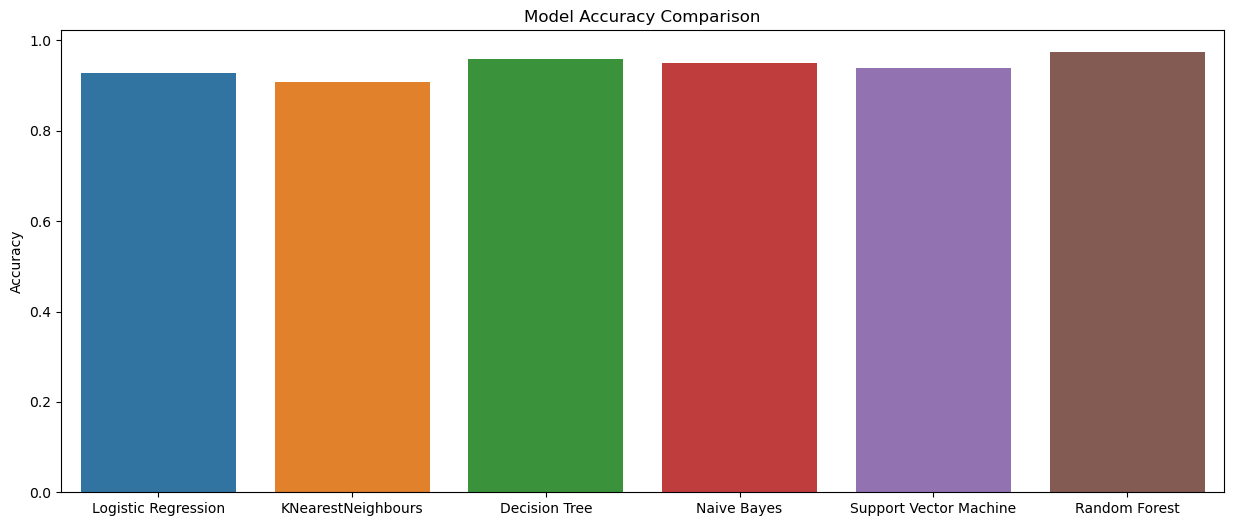

In [67]:
plt.figure(figsize=(15,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

<h1> Finally we get Random Forest has High Accuracy so, we can proceed for Model Deployment</h1>


In [68]:
import pickle as pk

In [69]:
pk.dump(rfc, open('model.pkl','wb'))

In [70]:
pk.dump(scaler,open('scaler.pkl','wb'))